## 1. Image Transition - Slide show effect

    Create a slide show of images in a folder with smooth transition between images using cv.addWeighted function

   Ref - https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_core/py_image_arithmetics/py_image_arithmetics.html

In [ ]:
import cv2
import numpy as np 
import os, time

# first let us read one image and check the shape. Then we create the window as per the image shape.
# One thing to ensure is that all the images in the directory must be of the same dimensions else 
# OpenCV will throw a dimension error.

img = cv2.imread('../Data/add_weighted_slideshow/Aviary Stock Photo 1.png')
imgShape = img.shape

# we create a blank white image of the same dimension as the images inside the folder
imgWnd = 255 * np.ones((imgShape[0], imgShape[1], imgShape[2]), np.uint8)

# we loop through the files inside the folder
for file in os.listdir('../Data/add_weighted_slideshow'):
    
    img = cv2.imread('../Data/add_weighted_slideshow' + '/' + file)

    # we create a loop from 0 - 1.1 (to include 1) as the alpha value varies between 0 and 1.
    for alpha in np.arange(0, 1.1, 0.1):
        
        beta = 1 - alpha # to create a transition effect, beta must be varied as per the alpha value.
        
        # load the transition into the image window
        cv2.imshow('Image Transition', cv2.addWeighted(img, alpha, imgWnd, beta, 0.0))
        
        time.sleep(0.2) # How much time a transition stays. Higher the value, the more time it takes to transition from
        # one alpha to the next one. It will not give a smooth transition effect in such case.
        
        if cv2.waitKey(1) & 0xff == 27:
            break
            

cv2.destroyAllWindows()

## 2. Image Pasting

    In this task of image pasting we will try to paste one image on top of another. We will take the OpenCV logo and 
    try to paste it on the top left corner of the Python logo image.

Image 1 - Python Logo Sahpe -  (711, 893, 3)
Image 2 - OpenCV Logo Sahpe -  (580, 822, 3)

Region of Intrest:  (580, 822, 3)


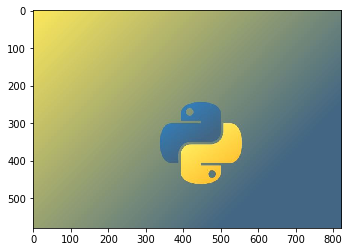

In [28]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# Load two images
img1 = cv2.imread('../Data/Python.jpg')
img2 = cv2.imread('../Data/opencv.png')

# put logo on top-left corner, So I create a ROI
print("Image 1 - Python Logo Sahpe - ", img1.shape)
print("Image 2 - OpenCV Logo Sahpe - ",img2.shape)
rows,cols,channels = img2.shape

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
roi = img1[0:rows, 0:cols]
print("\nRegion of Intrest: ", roi.shape)

plt.imshow(roi, cmap='gray')

    As the 2 images are of almost similar sizes, the target of blending on the top-left would not be accurate. With the 
    current shapes, the OpenCV image would get pasted somewhere in the middle of the Python image. 

    So we will crop the OpeCV to a smaller size so that it only contains our region of interest which is the region 
    of the logo.


Cropped OpenCV Image Shape -  (310, 260, 3)


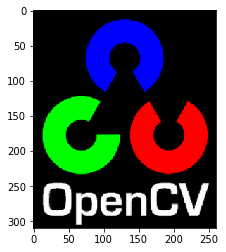

In [29]:
cropped_img2 = img2[130:440, 280:540]

print("Cropped OpenCV Image Shape - ", cropped_img2.shape)
plt.imshow(cropped_img2,cmap='gray')

Now the image looks good to be pasted on the top left.

**Next step would be to define the region of interest on image 1 - the Python logo image. This ROI would be a portion sliced out on the python logo image from the top-left corner with shape equal to the shape (310, 260) of the cropped openCV image.**

In [30]:
rows,cols,channels = cropped_img2.shape
roi = img1[0:rows, 0:cols]

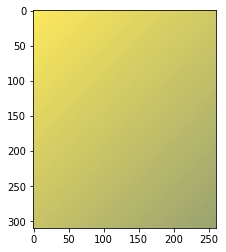

In [31]:
# Lets visualize our ROI
plt.imshow(roi,cmap='gray')

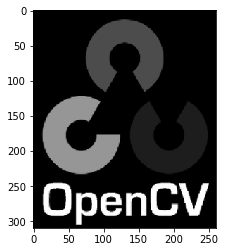

In [32]:
# Now create a mask and inverse mask of the logo to be applied to our region of interest.

img2gray = cv2.cvtColor(cropped_img2,cv2.COLOR_BGR2GRAY)
plt.imshow(img2gray,cmap='gray')

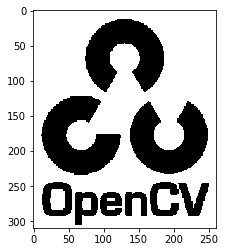

In [33]:
# cv2.threshold - brief Applies a fixed-level threshold to each array element.
# The function applies fixed-level thresholding to a multiple-channel array. The function is typically
# used to get a bi-level (binary) image out of a grayscale image ( #compare could be also used for
# this purpose) or for removing a noise, that is, filtering out pixels with too small or too large values.

ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)
plt.imshow(mask_inv,cmap='gray')

The next step wpuld be to black-out the area of logo in ROI..

The code will create an image with all original pixels of image2 - openCV logo that are in the foreground mask and an image with all original pixels of image roi that are in the background mask (inverted foreground mask).

So the result is an image where all non-mask pixel become black and the rest is unchanged.

First it computes the bitwise AND of the image, which will just be the image itself (exactly each bit that is 1 will be 1 afterwards). But in addition it applies the mask and leaves every pixel 0 that is not active in the mask.


Ref - https://stackoverflow.com/questions/47621395/opencv-bitwise-operations-physical-meaning

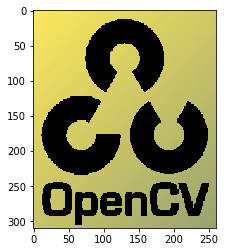

In [34]:
img1_bg = cv2.bitwise_and(roi, roi, mask = mask_inv)

plt.imshow(img1_bg,cmap='gray')

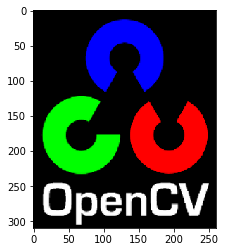

In [35]:
# Take only region of logo from openCV logo image.
img2_fg = cv2.bitwise_and(cropped_img2, cropped_img2, mask = mask)

plt.imshow(img2_fg,cmap='gray')

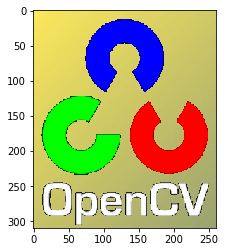

In [36]:
# Put logo in ROI and modify the main image. Just add the img1_fg and img2_bg.

logo_in_roi = cv2.add(img1_bg, img2_fg)
plt.imshow(logo_in_roi,cmap='gray')

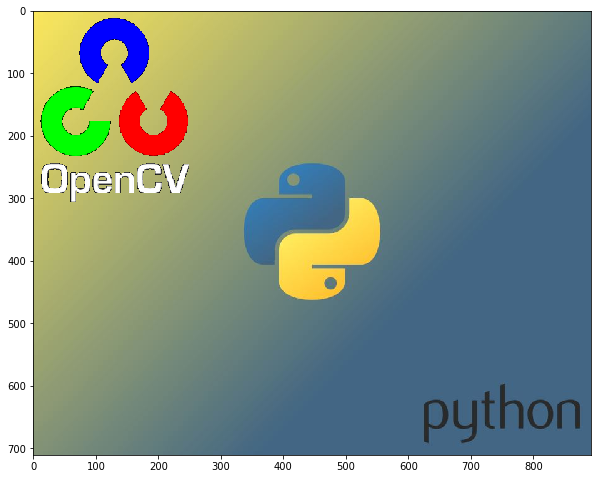

In [37]:
# Now that we have placed the logo in out ROI from image1, we will modify the ROI in image1 with the

img1[0:rows, 0:cols ] = logo_in_roi

plt.figure(figsize=(10, 14))
plt.imshow(img1,cmap='gray')

#### Pasting and blending images with un-equal sizes is a bit complex task. Following the above approach we can blend images of unequal sizes together. 